In [1]:
from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url="https://www.worldometers.info/coronavirus/?"
response=get(url)
response


<Response [200]>


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 2,027,830 Cases and 129,173 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favico
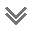

In [3]:
html_soup=BeautifulSoup(response.text,"html.parser")
html_soup

In [4]:
total_covid19=html_soup.find_all("div",id="maincounter-wrap")
total_covid19

[<div id="maincounter-wrap" style="margin-top:15px">
 <h1>Coronavirus Cases:</h1>
 <div class="maincounter-number">
 <span style="color:#aaa">2,027,830 </span>
 </div>
 </div>, <div id="maincounter-wrap" style="margin-top:15px">
 <h1>Deaths:</h1>
 <div class="maincounter-number">
 <span>129,173</span>
 </div>
 </div>, <div id="maincounter-wrap" style="margin-top:15px;">
 <h1>Recovered:</h1>
 <div class="maincounter-number" style="color:#8ACA2B ">
 <span>494,562</span>
 </div>
 </div>]

In [5]:
inner_covid19=html_soup.find_all("div",class_="maincounter-number")
inner_covid19

[<div class="maincounter-number">
 <span style="color:#aaa">2,027,830 </span>
 </div>, <div class="maincounter-number">
 <span>129,173</span>
 </div>, <div class="maincounter-number" style="color:#8ACA2B ">
 <span>494,562</span>
 </div>]

In [6]:
Headers=[]
Cases=[]
for container in total_covid19:
    header=container.h1.text
    Headers.append(header)
for inner_container in inner_covid19:
    cases=inner_container.span.text
    Cases.append(cases)

In [7]:
print("{} {}\n{} {}\n{} {}".format(Headers[0],Cases[0],Headers[1],Cases[1],Headers[2],Cases[2]))

Coronavirus Cases: 2,027,830 
Deaths: 129,173
Recovered: 494,562


In [8]:
Active_Covid19=html_soup.find('div',class_="panel panel-default")
Active_Covid19

<div class="panel panel-default">
<div class="panel-heading" style="text-align:center">
<span class="panel-title" style="font-size:18px; text-transform:uppercase; font-weight:100">
Active Cases
</span>
</div>
<div class="panel-body" style="text-align:center; height:200px;">
<div class="panel_flip">
<div class="panel_front" style="width:100%;height:100%;">
<div class="number-table-main">1,404,095</div>
<div style="font-size:13.5px">Currently Infected Patients</div>
<div style="padding-top:20px;position:relative;text-align:center; ">
<div style="float:left; text-align:center">
<span class="number-table" style="color:#8080FF">1,352,583</span> (<strong>96</strong>%)
<div style="font-size:13px">in Mild Condition</div><br/>
</div>
<div style="float:right; text-align:center"><span class="number-table" style="color:red ">51,512</span> (<strong>4</strong>%)
<div style="font-size:13px">Serious or Critical</div><br/>
</div>
</div>
<a class="flip_cases_front" href="javascript: void(0);" style="cle

In [9]:
Acitve_Header=Active_Covid19.find("span",class_="panel-title").text
Acitve_Header=Acitve_Header.replace("\n","")

In [10]:
Active_data=Active_Covid19.find("div",class_="panel_front")
Active_data

<div class="panel_front" style="width:100%;height:100%;">
<div class="number-table-main">1,404,095</div>
<div style="font-size:13.5px">Currently Infected Patients</div>
<div style="padding-top:20px;position:relative;text-align:center; ">
<div style="float:left; text-align:center">
<span class="number-table" style="color:#8080FF">1,352,583</span> (<strong>96</strong>%)
<div style="font-size:13px">in Mild Condition</div><br/>
</div>
<div style="float:right; text-align:center"><span class="number-table" style="color:red ">51,512</span> (<strong>4</strong>%)
<div style="font-size:13px">Serious or Critical</div><br/>
</div>
</div>
<a class="flip_cases_front" href="javascript: void(0);" style="clear: both;display: block;position:absolute;bottom:-8px;width:100%;">Show Graph</a>
</div>

In [11]:
Total_active=Active_data.find("div",class_="number-table-main").text
Total_active

'1,404,095'

In [12]:
Active_text=Active_data.find('div',style="font-size:13.5px").text
Active_text

'Currently Infected Patients'

In [13]:
Acitve_mid_condition=Active_data.find("span",class_="number-table").text
Acitve_mid_condition

'1,352,583'

In [14]:
Active_percentage=Active_data.find("strong").text
Active_percentage

'96'

In [15]:
Acitve_Condition_text=Active_data.find("div",style="font-size:13px")
Acitve_Condition_text.text

'in Mild Condition'

In [16]:
main_container=html_soup.find_all("div",class_="panel panel-default")

In [17]:
headers=html_soup.find_all("div",class_="panel-heading")
HEADER=[]
for h in headers:
    header_=h.span.text
    header_=header_.replace("\n","")
    HEADER.append(header_)
print(HEADER)

['Active Cases', 'Closed Cases']


In [18]:
total_case=html_soup.find_all("div",class_="number-table-main")
TOTAL_CASE=[]
for t in total_case:
    total_=t.text
    TOTAL_CASE.append(total_)
print(TOTAL_CASE)

['1,404,095', '623,735']


In [19]:
text_case=html_soup.find_all("div",style="font-size:13.5px")
TEXT_CASE=[]
for txt in text_case:
    text_=txt.text
    TEXT_CASE.append(text_)
print(TEXT_CASE)

['Currently Infected Patients', 'Cases which had an outcome:']


In [20]:
all_data_L=html_soup.find_all("div",style="float:left; text-align:center")
ALL_DATA_Left=[]
for a_l in all_data_L:
    c_d_l=a_l.span.text
    print(c_d_l)
    ALL_DATA_Left.append(c_d_l)
    p_d_l=a_l.strong.text
    print(p_d_l)
    ALL_DATA_Left.append(p_d_l)
    t_d_l=a_l.find("div",style="font-size:13px").text
    print(t_d_l)
    ALL_DATA_Left.append(t_d_l)
    
print(ALL_DATA_Left)

1,352,583
96
in Mild Condition
494,562
79
Recovered / Discharged
['1,352,583', '96', 'in Mild Condition', '494,562', '79', 'Recovered / Discharged']


In [21]:
all_data_R=html_soup.find_all("div",style="float:right; text-align:center")
ALL_DATA_Right=[]
for a_r in all_data_R:
    c_d_r=a_r.span.text
    c_d_r=c_d_r.replace("\n","")
    print(c_d_r)
    ALL_DATA_Right.append(c_d_r)
    p_d_r=a_r.strong.text
    print(p_d_r)
    ALL_DATA_Right.append(p_d_r)
    t_d_r=a_r.find("div",style="font-size:13px").text
    print(t_d_r)
    ALL_DATA_Right.append(t_d_r)
    
print(ALL_DATA_Right)

51,512
4
Serious or Critical
129,173
21
Deaths
['51,512', '4', 'Serious or Critical', '129,173', '21', 'Deaths']


In [22]:
Name=[]
first_covid19_countryName=html_soup.find_all("a",class_="mt_a")
for i in first_covid19_countryName:
    name=i.text
    Name.append(name)


In [23]:
Heading=[]
first_covid19_countryheading=html_soup.find("thead")
iner=first_covid19_countryheading.find_all("th")
for i in iner:
    headings=i.text.replace("\n","")
    Heading.append(headings)

In [46]:
Total_case1=[]
total_cases1=html_soup.find_all("td",style="font-weight: bold; text-align:right")
for i in total_cases:
    t_case1=i.text
    Total_case1.append(t_case1)

Total_case2=[]
total_cases2=html_soup.find_all("td",style="text-align:right;font-weight:bold;")
for i in total_cases2:
    t_case2=i.text
    Total_case2.append(t_case2)

Total_case3=[]
total_cases3=html_soup.find_all("td",style="text-align:right;font-weight:bold;")
for i in total_cases3:
    t_case3=i.text
    Total_case3.append(t_case3)

In [49]:
Total_case3

['549,895',
 '88,201',
 '104,291',
 '98,769',
 '56,526',
 '85,264',
 '21,679',
 '58,909',
 '22,026',
 '24,769',
 '18,368',
 '10,410',
 '10,175',
 '22,306',
 '17,109',
 '5,834',
 '9,765',
 '10,343',
 '9,718',
 '10,996',
 '2,750',
 '7,204',
 '5,242',
 '7,101',
 '6,538',
 '6,628',
 '5,637',
 '6,563',
 '3,624',
 '2,698',
 '5,231',
 '4,435',
 '4,852',
 '4,751',
 '2,868',
 '4,221',
 '2,342',
 '3,972',
 '4,374',
 '3,513',
 '3,489',
 '3,298',
 '3,037',
 '3,217',
 '3,407',
 '2,740',
 '2,865',
 '2,498',
 '1,103',
 '1,738',
 '1,978',
 '1,583',
 '1,821',
 '1,053',
 '1,834',
 '1,643',
 '1,234',
 '642',
 '1,001',
 '1,253',
 '1,196',
 '556',
 '1,248',
 '649',
 '1,034',
 '1,164',
 '836',
 '1,022',
 '1,132',
 '797',
 '816',
 '923',
 '554',
 '831',
 '775',
 '706',
 '666',
 '639',
 '716',
 '606',
 '670',
 '638',
 '61',
 '471',
 '617',
 '556',
 '518',
 '611',
 '549',
 '466',
 '321',
 '218',
 '224',
 '366',
 '363',
 '362',
 '379',
 '372',
 '352',
 '362',
 '155',
 '252',
 '351',
 '263',
 '283',
 '250',
 '12